In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\aleks\\Desktop\\courseML\\08-Linear-Regression-Models\\Advertising.csv')


In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df['total_spend'] = df['TV'] + df['radio'] +df['newspaper']
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

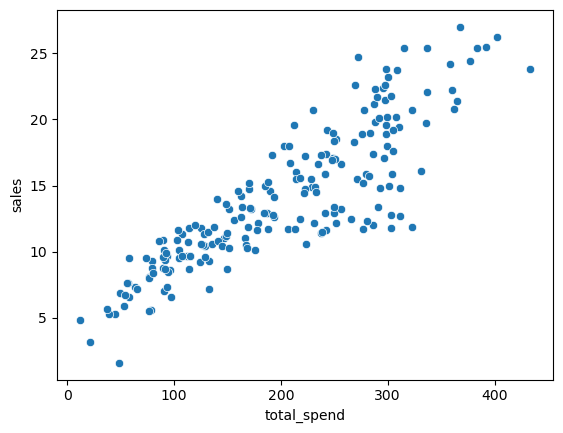

In [7]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

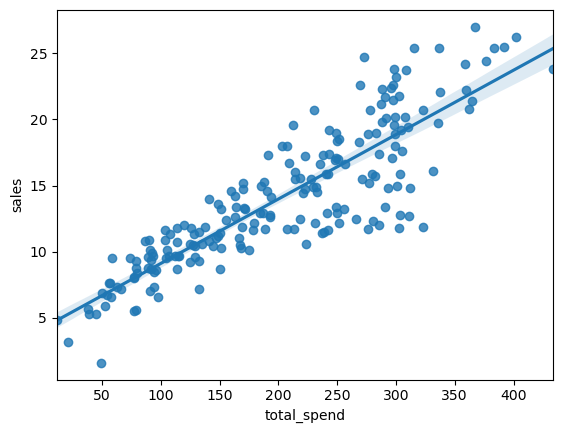

In [8]:
sns.regplot(data = df, x = 'total_spend', y = 'sales')

In [9]:
X = df['total_spend']
y = df['sales']
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

In [13]:
potential_spend = np.linspace(0,500,100)
predicted_sales = 0.04868788 * potential_spend + 4.24302822

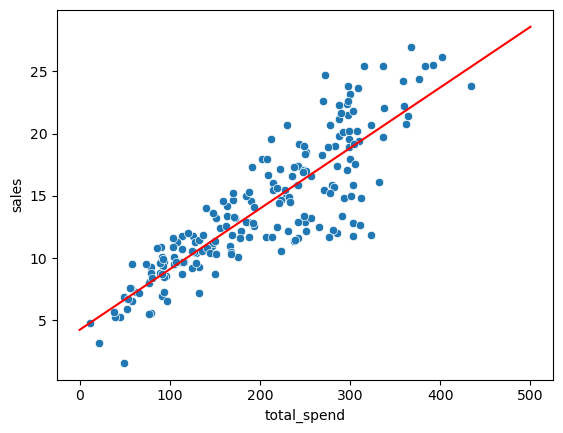

In [15]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
plt.plot(potential_spend, predicted_sales, color = 'red')


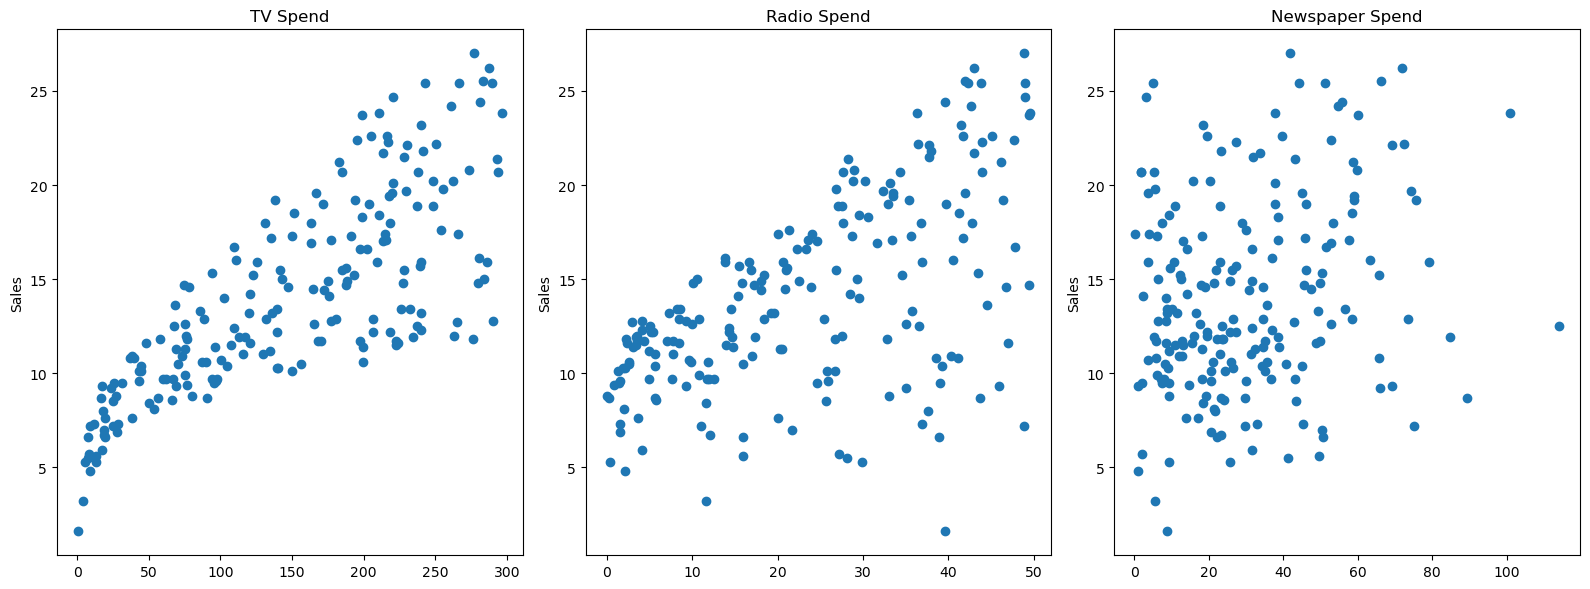

In [5]:
#18.11 Scikit-Learn - Train Test Split
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [10]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)   

In [21]:
len(X_test)

60

In [24]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
test_predictions = model.predict(X_test)

In [48]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, test_predictions) # среднее абсолютное отклонение 1.5116692224549084
np.sqrt(mean_squared_error(y_test, test_predictions)) # среднее квадратическое отклонение 1.9485372043446387


0.6646431757269019

In [33]:
df['sales'].mean()

14.0225

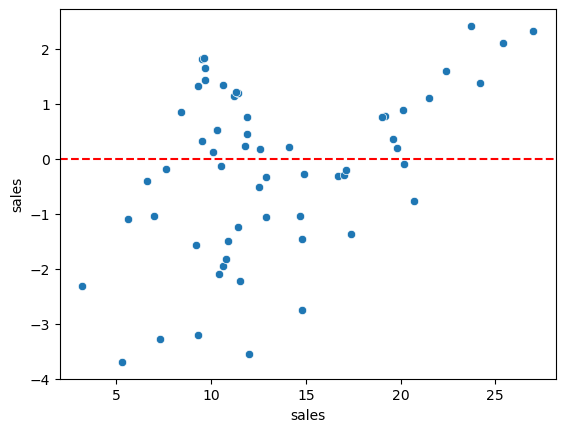

In [50]:
# анализ остатков
test_residuals = y_test - test_predictions
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

<AxesSubplot:xlabel='sales', ylabel='Count'>

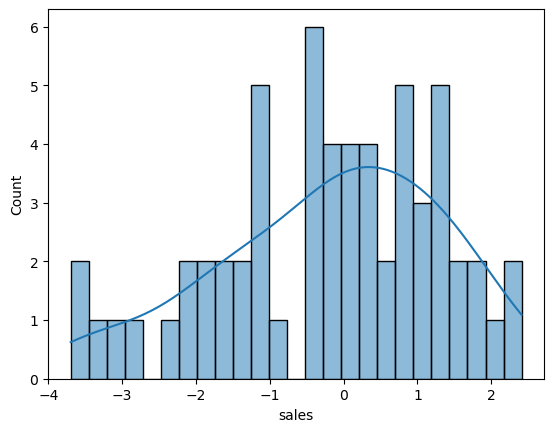

In [52]:
sns.histplot(test_residuals, bins = 25, kde = True)

In [53]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [54]:
final_model.coef_ #  коэффициенты B1, B2, B3

array([ 0.04576465,  0.18853002, -0.00103749])

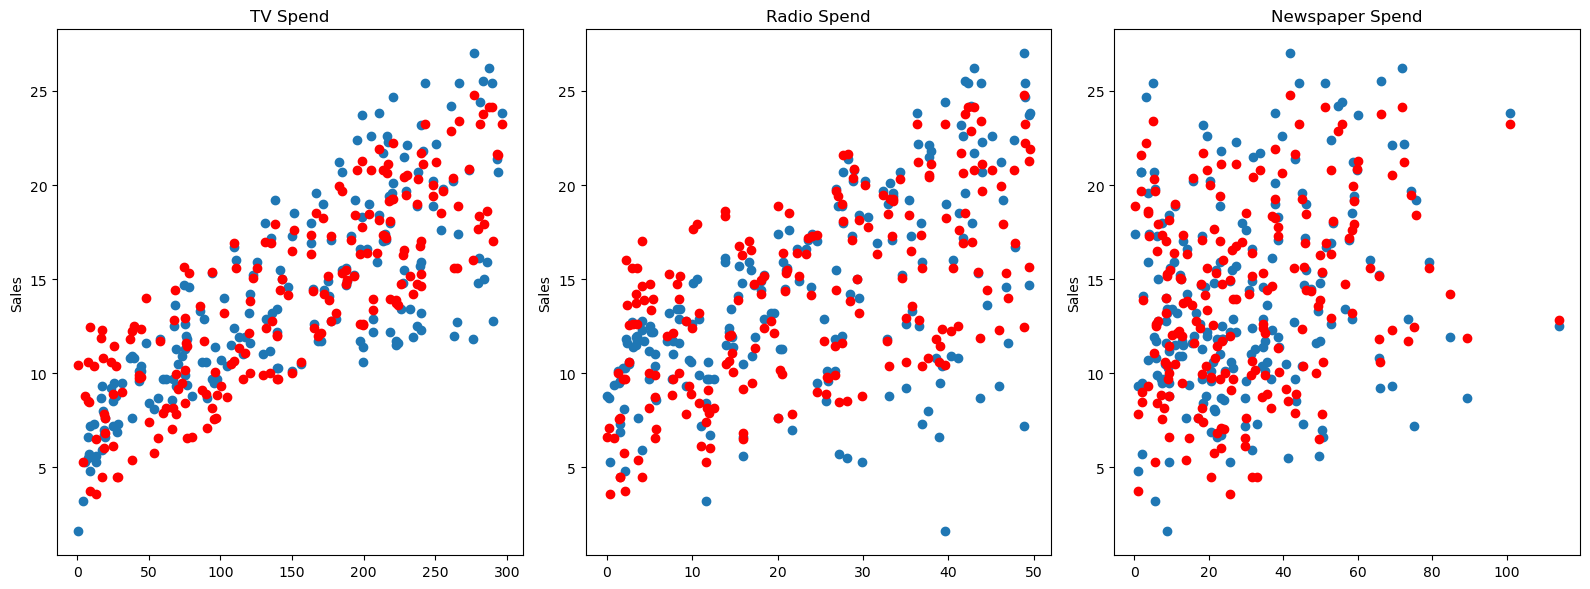

In [57]:
y_hat = final_model.predict(X)
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [59]:
from joblib import dump, load
dump(final_model,'Final model')

['Final model']

In [62]:
loaded_model = load('Final model')
X.shape

(200, 3)

In [64]:
# 149 TV, 22 radio, 12 Newspaper
campaign = [[149,22,12]]
loaded_model.predict(campaign)

array([13.893032])

In [6]:
# полиномиальная регрессия 
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
X = df.drop('sales', axis = 1)
y = df['sales']


In [10]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False) #degree - макс степень признаков
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [16]:
poly_features = polynomial_converter.transform(X)
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [20]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [17]:
230.1*37.8

8697.779999999999

In [18]:
37.8*69.2

2615.7599999999998

In [19]:
230.1 ** 2

52946.009999999995

In [22]:
X_train, X_test, y_train, y_test = train_test_split(poly_features , y, test_size=0.3, random_state=101)


In [41]:
model_pol = LinearRegression()
model_pol.fit(X_train, y_train)
model_pol.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [30]:
test_predictions_pol = model_pol.predict(X_test)

In [36]:
MAE = mean_absolute_error(y_test, test_predictions)

In [37]:
MSE = mean_squared_error(y_test, test_predictions)

In [38]:
RMSE = np.sqrt(MSE)

In [42]:
MAE

0.48967980448035603

In [43]:
RMSE

0.6646431757269019

In [44]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [45]:
#Полиномиальная регрессия - выбираем степень полинома
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features , y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [46]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.35170836883993584,
 0.2509342986383564,
 0.1992945643722808,
 5.419139410889907,
 0.15123423820373452,
 0.17171052265410153]

In [47]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269019,
 0.5803286825231682,
 0.5077742654793547,
 2.575810057417929,
 4.265907641196195,
 1382.2051637442403,
 3733.4276789297824,
 95489.32391816446]

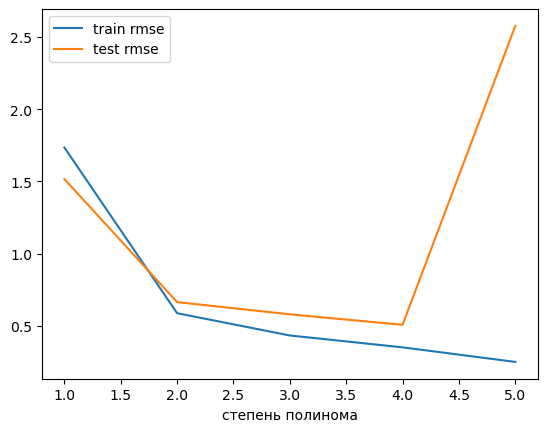

In [51]:
plt.plot(range(1,6),train_rmse_errors[:5], label = "train rmse")
plt.plot(range(1,6),test_rmse_errors[:5], label = "test rmse")
plt.xlabel('степень полинома')
plt.legend()

In [52]:
final_poly_conventor = PolynomialFeatures(degree = 3, include_bias = False)

In [54]:
final_model = LinearRegression()

In [55]:
full_converted_X = final_poly_conventor.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [57]:
from joblib import dump, load
dump(final_model, 'final_mode_pol.joblib')
dump(final_poly_conventor, 'final_poly_conventor.joblib')


['final_poly_conventor.joblib']

In [62]:
loaded_converter = load('final_poly_conventor.joblib')
loaded_model = load('final_mode_pol.joblib')

In [63]:
campaign = [[149,22,12]]
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [64]:
transformed_data = loaded_converter.fit_transform(campaign)
loaded_model.predict(transformed_data)

array([14.64501014])